# Data Visualization - Human Activity Recognition

In this Notebook we will visualize the inertial signals that will be used for Human Activity Recognition.
The data comprises accelerometer and gyroscope signals, both in <i>x</i>, <i>y</i>, and <i>z</i> axis.

We will start by reading the data and creating a dataframe that, for each of the 7352 samples, includes the activity label (which activity was being performed when the signal was recorded), and both accelerometer and gyroscope signals in <i>x</i>, <i>y</i>, and <i>z</i> axis. Each one of the signal values is then composed by an array with a lenght of 128. Additionally, we will also calculate the mean, maximum, and minimum values of each signal for each sample and add them to the dataframe. Therefore, this pandas dataframe will be composed by 7352 rows and 25 columns (1 for the activity, 6 for the signals and 3*6 for mean, maximum, and minimum value of each signal). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dir_data = 'data/train/'  # directory of the data file

file_names = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt',
              'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt']  # names of the signals files
file_labels = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

act_labels = np.loadtxt(dir_data + 'y_train.txt', dtype='int')  # load labels file
act_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']  # activity names

df = pd.DataFrame(act_labels, columns=['activity'])  # create dataframe with the labels of each sample
for i in range(len(file_names)):
    data = np.loadtxt(dir_data + 'Inertial Signals/' + file_names[i])  # read signal file
    df[file_labels[i]] = data.tolist()  # add signal to the dataframe
    
    mean_v, max_v, min_v = [], [], []
    for d in data:  # calculate mean, maximum, and minimum value of each sample
        mean_v += [np.mean(d)]
        max_v += [np.max(d)]
        min_v += [np.min(d)]
    
    df['Mean ' + file_labels[i]] = mean_v  # add values to the dataframe
    df['Max ' + file_labels[i]] = max_v
    df['Min ' + file_labels[i]] = min_v

print(df.head())

   activity                                              acc_x  Mean acc_x  \
0         5  [0.0001808515, 0.01013856, 0.009275574, 0.0050...    0.002269   
1         5  [0.001093752, 0.004550077, 0.002879173, 0.0022...    0.000174   
2         5  [0.003531266, 0.002285063, -0.0004197538, -0.0...    0.000428   
3         5  [-0.001772352, -0.001311448, 0.0003876795, 0.0...    0.000329   
4         5  [8.747685e-05, -0.0002719175, 0.001022103, 0.0...   -0.000195   

   Max acc_x  Min acc_x                                              acc_y  \
0   0.010810  -0.004294  [0.01076681, 0.00657948, 0.008928878, 0.007488...   
1   0.005251  -0.006706  [-0.004687588, -0.007487894, -0.008429991, -0....   
2   0.008167  -0.010483  [0.004455942, 0.003045876, 0.001776179, 0.0009...   
3   0.008167  -0.010483  [-0.01018541, -0.01125254, -0.0121963, -0.0111...   
4   0.005650  -0.006847  [-0.003856929, -0.002837935, -0.003086418, -0....   

   Mean acc_y  Max acc_y  Min acc_y  \
0   -0.001655   0.01076

Next, we will choose one sample for each activity and visualize the inertial signals.

All plots of accelerometer and gyroscope signals show the y axis values between -1 m/s^2 and +1 m/s^2, and between -2 rad/s and +2 rad/s, respectively. 

In [2]:
time = np.arange(0, 2.57, 2.57/128)  # x-axis of the plots - all signals have a duration of 2.57 s

def signal_visualization(activity, sample=2):
    label = act_names.index(activity) + 1  # activity labels go from 1 to 6
    act = df[df['activity'] == label]

    plt.figure(figsize=(15, 10))
    for i in range(len(file_labels)):
        signal = act[file_labels[i]].values[sample]
        plt.subplot(2, 3, i + 1)
        plt.plot(time, signal)
        if i == 0: plt.ylabel('m/s^2')
        elif i == 3: plt.ylabel('rad/s')
        else: plt.yticks([])
        if i < 3:
            plt.ylim([-1, 1])
            plt.xticks([])
        else:
            plt.xlabel('s')
            plt.ylim([-2, 2])
        plt.title(file_labels[i])
        plt.suptitle(activity)

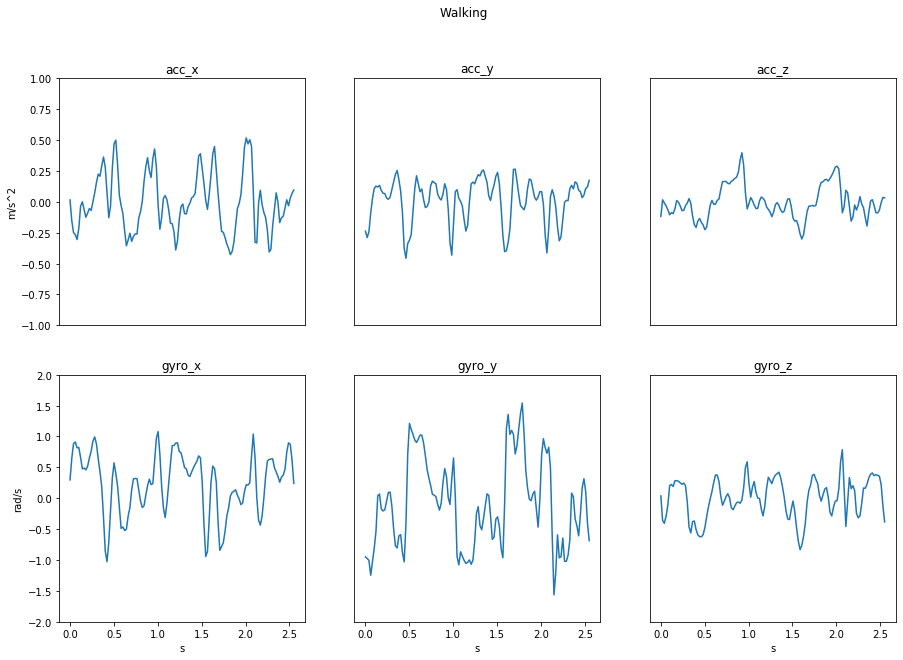

In [3]:
signal_visualization('Walking')

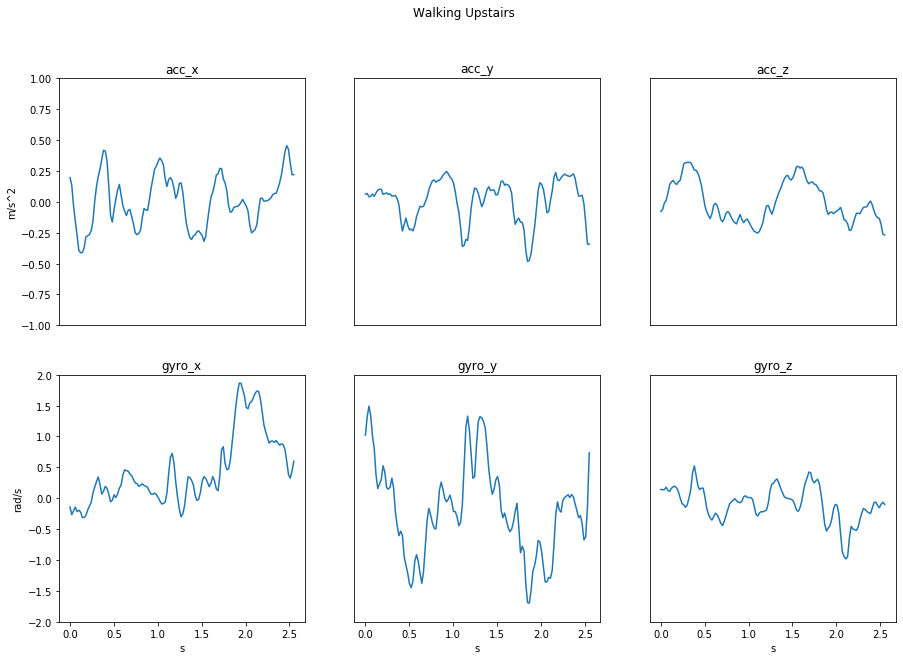

In [4]:
signal_visualization('Walking Upstairs')

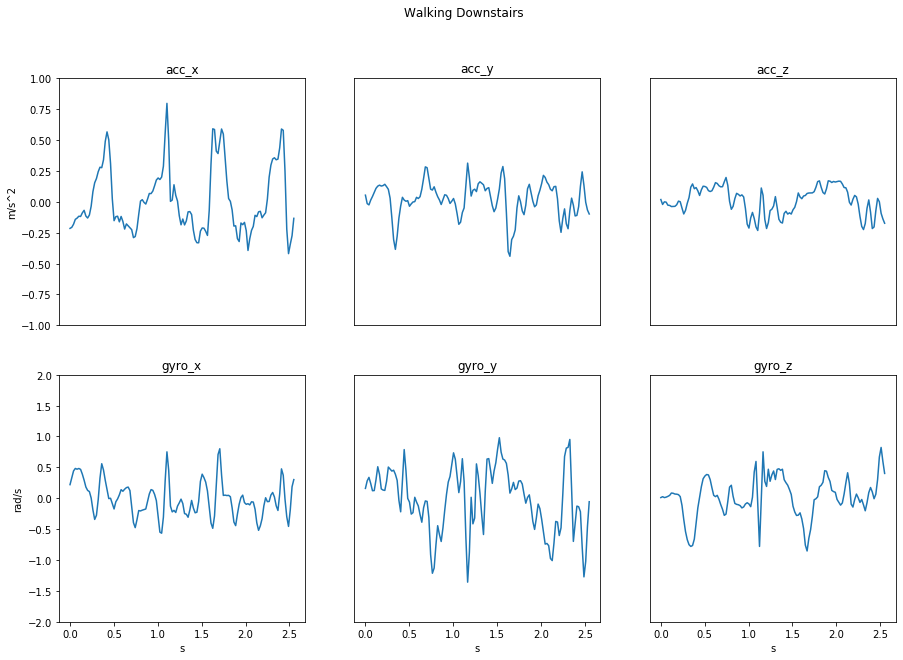

In [5]:
signal_visualization('Walking Downstairs', sample=0)

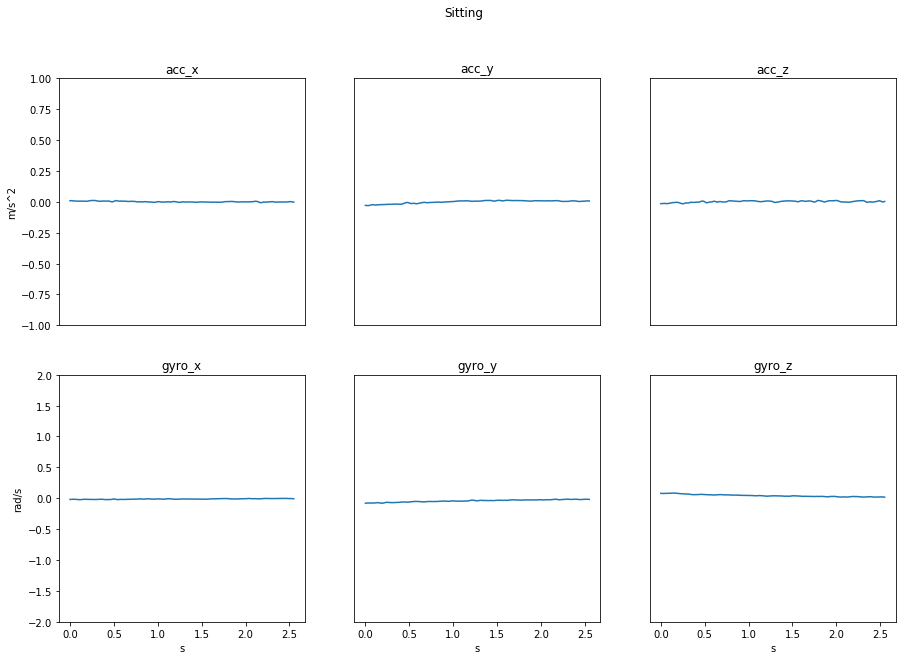

In [6]:
signal_visualization('Sitting')

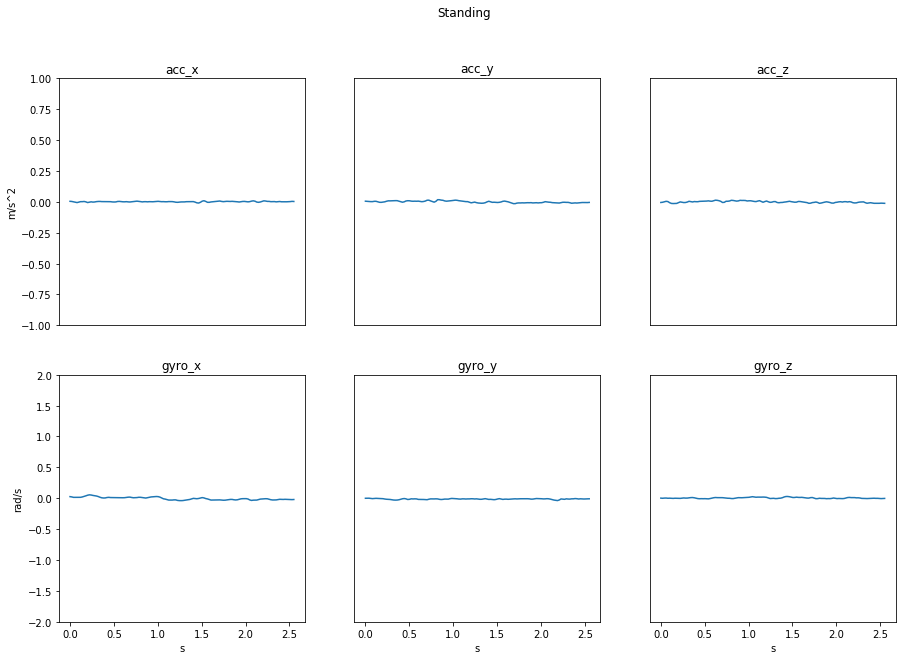

In [7]:
signal_visualization('Standing')

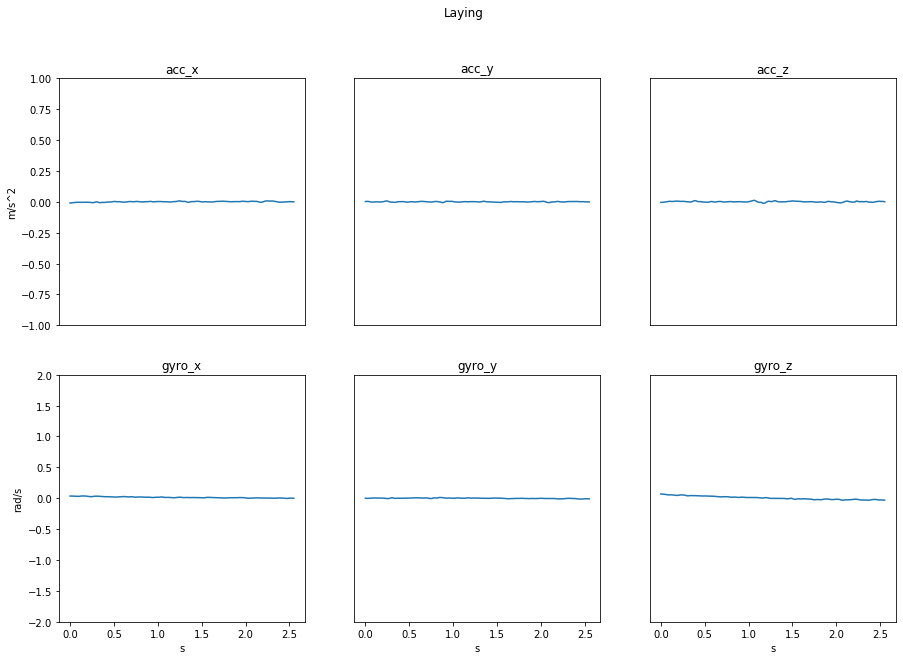

In [8]:
signal_visualization('Laying')

By visualizing all the graphs we can see right away a distinction between walking, walking upstairs and walking downstairs graphs (dynamic classes), and sitting, standing and laying (static classes), as the amplitude of all signals is much greater in the first group. However, with these visualizations alone we are not able to distinguish the classes inside the dynamic and static groups.

We can quickly visualize the histograms of mean, maximum, and minimum values of acceleration in the x-axis for each class to see if there is any other clear distinction between the classes.

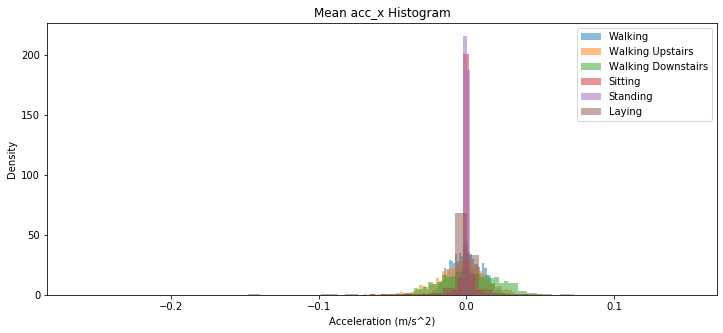

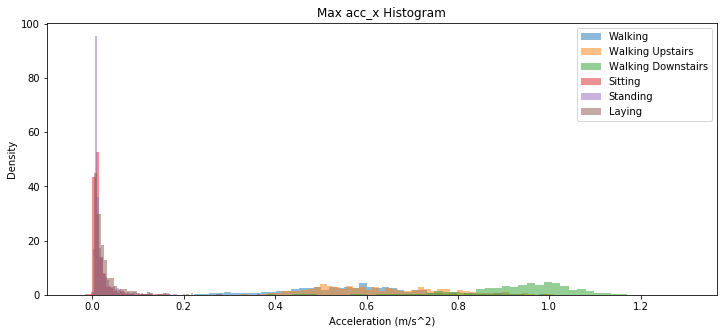

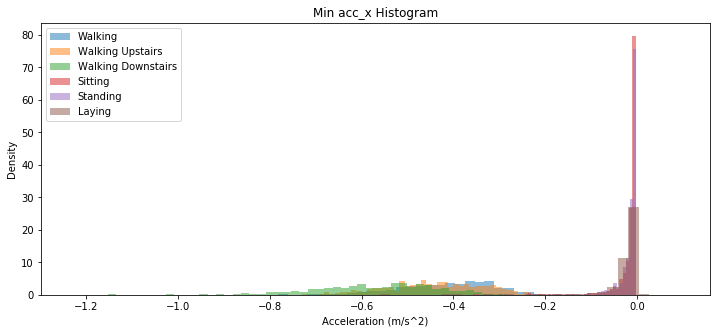

In [9]:
measures = ['Mean acc_x', 'Max acc_x', 'Min acc_x']
act_classes = df[['activity'] + measures].groupby('activity')  # grouping samples by activity

stds = []
for m in measures:
    std = []
    plt.figure(figsize=(12,5))
    for i in range(6):
        plt.hist(act_classes.get_group(i+1)[m], alpha=0.5, bins=50, density=True, label=act_names[i])
        std += [act_classes.get_group(i+1)[m].std()]  # save standard deviation of each group
    plt.legend()
    plt.ylabel('Density')
    plt.xlabel('Acceleration (m/s^2)')
    plt.title(m + ' Histogram')    
    stds += [std]

By visualizing the histograms we can again observe the clear distinction between the two groups of classes - dynamic and static.

- The static classes (sitting, standing, laying) have their histograms of maximum and minimum x-acceleration much closer to 0 and a lower standard deviation, when compared to the dynamic classes.
- The dynamic classes (walking, walking upstairs, walking downstairs) have their histograms of maximum and minimum x-acceleration further away from 0 and a higher standard deviation.
- If we look at the histograms of maximum values, we can now see a small distinction for the Walking Downstairs class - it is slightly shifted to the right, that is, in average, the maximum value seen in x-acceleration signals is higher for people walking downstairs.

In [10]:
x=pd.DataFrame(stds)
x.columns=['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
x.index=['Mean acc x', 'Max acc x', 'Min acc x']
display(x)

,Walking,Walking Upstairs,Walking Downstairs,Sitting,Standing,Laying
Mean acc x,0.010377,0.016080,0.019599,0.008655,0.004142,0.020926
Max acc x,0.144122,0.136961,0.129368,0.025502,0.026310,0.033289
Min acc x,0.107295,0.104695,0.130048,0.030452,0.024814,0.082401


The table above presents the standard deviation of each group. As expected, it is higher for the dynamic classes and lower for the static classes.